# Python libraries
- Scientific Computation
  - NumPy
  - SciPy: functions for linear algebra, optimization, integration and statistics (built on top of NumPy)
  - Statsmodels
  - Pandas: "relational" data. Series (one dimension) and Data Frames (two dimensional)
- Data Visualization
  - MatplotLib
  - Seaborn: complimentary to Matplotlib. targets statistical data visualizations
- Machine Learning
  - Scikit-Learn
- Deep Learning (Keras / TensorFlow)
  - TensorFlow: data flow graph computations
  - Keras: neural networks. Can use Theano or TensorFlow

# Pandas

In [99]:
import pandas as pd

df = pd.read_csv('Data/ACS_16_5YR_B24011_with_ann.csv', usecols=['GEO.id', 'GEO.id2'], encoding='latin-1')
# df = df.drop(0)
df.head(2)

,GEO.id,GEO.id2
0,Id,Id2
1,0500000US01001,01001


In [103]:
# excel sheet names
workbook = pd.ExcelFile('Data/Yelp_Selected_Businesses.xlsx')
workbook.sheet_names

['Biz_id_RESDU',
 'Biz_id_4JNXU',
 'Biz_id_YJ8lj',
 'Biz_id_ujHia',
 'Biz_id_na4Th']

In [321]:
# save results
df.to_csv('NewSavedView.csv', index=False) #Notice how we have to pass index=False if we do not want it included in our output

In [335]:
# supress scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# max rows / columns
# pd.options.display.max_rows = 99999
# pd.options.display.max_columns = 99999

## Series and Data Frames

In [157]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('Data/turnstile_180901.txt')
print(len(df))
# df.info()

4848


In [158]:
def contains_n(text):
    return 'N' in text

df['On_N_Line'] = df.LINENAME.map(contains_n)

In [159]:
df.columns

# change column data types
df.ENTRIES = df.ENTRIES.astype(int)
df.ENTRIES.dtype

# dates
# iloc slicing series / dataframes
print(df.DATE.iloc[0])
# pd.to_datetime(df.DATE, format='%m/%d/%Y').head()
pd.to_datetime(df.DATE).head()
# dt methods
df.DATE = pd.to_datetime(df.DATE)
df.DATE.dt.day_name().head()

08/25/2018


0    Saturday
1    Saturday
2    Saturday
3    Saturday
4    Saturday
Name: DATE, dtype: object

In [171]:
# rename / drop columns, set new index
df = df.rename(columns = {'DATE': 'date'})
df.columns = [col.title().strip() for col in df.columns]
# df = df.drop('C/A', axis = 1) # If you don't pass the axis=1 parameter, pandas will try and drop a row with the specified index
# df = df.set_index('UNIT')
# df = df.reset_index()
df.head()

,C/A,Unit,Scp,Station,Linename,Division,Date,Time,Desc,Entries,Exits,On_N_Line,Dayofweek
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-08-25,00:00:00,REGULAR,6736067,2283184,True,5
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-08-25,04:00:00,REGULAR,6736087,2283188,True,5
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-08-25,08:00:00,REGULAR,6736105,2283229,True,5
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-08-25,12:00:00,REGULAR,6736180,2283314,True,5
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-08-25,16:00:00,REGULAR,6736349,2283384,True,5


,Dayofweek,Entries,Exits,On_N_Line
0,0,4.765429e+10,44923086816,701.0
1,1,4.763098e+10,44906956142,699.0
2,2,4.758829e+10,44856581430,684.0
3,3,4.772049e+10,44934228508,700.0
4,4,4.759068e+10,44858474046,684.0
5,5,4.758862e+10,44853949433,690.0
6,6,4.758924e+10,44854509635,690.0


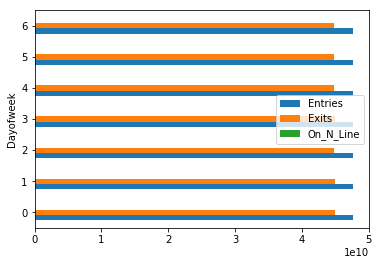

In [174]:
df.Date = pd.to_datetime(df.Date)
df['Dayofweek'] = df.date.dt.dayofweek
grouped = df.groupby('Dayofweek').sum()
grouped.plot(kind = 'barh')
grouped = grouped.reset_index()
grouped

,Dayofweek,Entries,Exits,On_N_Line
IsWeekend,,,,
False,2.0,4.763695e+10,4.489587e+10,693.6
True,5.5,4.758893e+10,4.485423e+10,690.0


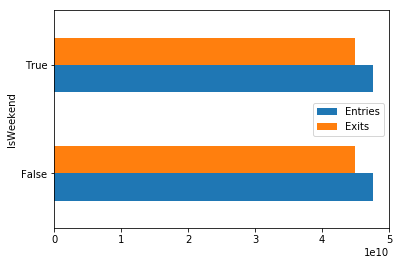

In [184]:
grouped['IsWeekend'] = grouped.Dayofweek.map({0:False,1:False,2:False,3:False,4:False,5:True,6:True})
wkend = grouped.groupby('IsWeekend').mean()
display(wkend)
wkend[['Entries', 'Exits']].plot(kind='barh')

## Accessing Data

In [309]:
# dataframes

df.head()
df.tail()
# df.info()
df.index
df.dtypes
df.columns
df.shape

df.iloc[5:80, 2:10] # integer-location based indexing
# df.loc[:, 'Linename'] # label-location based indexing
# or
df['Linename']
# boolean indexing
display(df.loc[(df['Entries'] > 7740888) & (df['Exits'] > 1367254), ['Station', 'Entries', 'Exits']][0:10])

# update values
df.loc[df['Entries'] > 7740888, ['Station']] = 'Station4'

# create new column
# df.loc[df['Entries'] > 7740888, 'NewCol'] = 'Busy'

,Station,Entries,Exits
295,Station4,10964211,1367258
296,Station4,10964268,1367261
297,Station4,10964438,1367285
298,Station4,10964772,1367303
299,Station4,10965307,1367311
300,Station4,10965692,1367317
301,Station4,10965767,1367318
302,Station4,10965821,1367321
303,Station4,10966055,1367336
304,Station4,10966439,1367348


In [313]:
# series

linenames = df['Linename']
linenames.unique()

array(['NQR456W', 'NQRW', 'ACENQRS1237W', 'BDFMNQRW', 'NRW', 'LNQR456W'],
      dtype=object)

## Statistical Methods

In [352]:
df.describe()
df.mean()
df['Entries'].mean()
df['Entries'].quantile(.9) # get the value for 90% quantile for a specific column
df['Entries'].count()
df['Entries'].std()
df['Entries'].sum()
# pd.options.display.max_rows = 99999
# display(df['Entries'].cumsum()) # the cumulative sum, where each cell index contains the sum of all indices lower than, and including, itself
df['Station'].unique()
df['Station'].value_counts()

array(['59 ST', 'Station4', '5 AV/59 ST', '57 ST-7 AV', '49 ST',
       'TIMES SQ-42 ST', '34 ST-HERALD SQ', '28 ST', '23 ST',
       '14 ST-UNION SQ'], dtype=object)